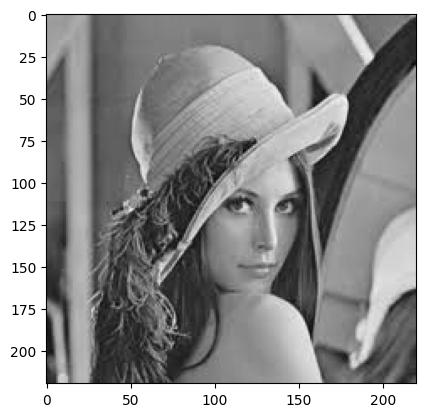

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('./lena.jpg',0)
plt.imshow(img,"gray")


(Text(0.5, 0, 'pixel value'), Text(0, 0.5, 'frequency'))

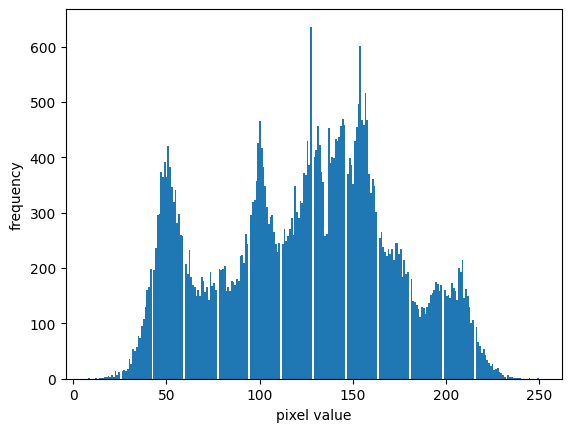

In [2]:
pixel = img.ravel()
plt.hist(pixel,bins = 256)
plt.xlabel('pixel value'), plt.ylabel('frequency')

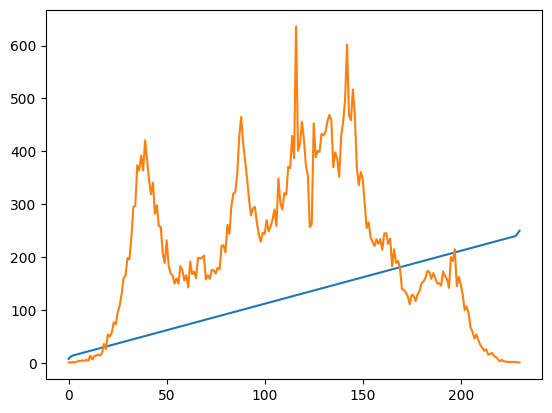

In [3]:
img = cv2.imread('./lena.jpg', 0)
pixel = img.ravel()
pixel_list = np.bincount(pixel, minlength=256)
data = []
for i in range(256):
    if pixel_list[i]:
        data.append([i, pixel_list[i]])
data = np.array(data,dtype=float)
plt.plot(data)

In [4]:
def mean_shift(pixel_list, bandwidth, max_iterations=1000):
    data = pixel_list[:,0]
    centroids = np.copy(data)
    for _ in range(max_iterations):
        distances = np.abs(centroids - centroids[:, np.newaxis])
        weights = np.exp(-0.5 * (distances / bandwidth) ** 2)
        new_centroids = np.sum(pixel_list[:,1] * centroids[:, np.newaxis] * weights, axis=0) / np.sum(pixel_list[:,1] * weights, axis=0)
        if np.all(np.isclose(new_centroids, centroids, atol=1e-9)):
            print("已经收敛")
            break
        centroids = new_centroids
    return np.round(centroids, 3)


bandwidth = 10  # 你可以根据数据调整带宽
cluster_centers = mean_shift(data, bandwidth)

# 获取聚类中心
cluster_center = np.unique(cluster_centers)
print("Cluster centers : \n", cluster_center)

已经收敛
Cluster centers : 
 [ 40.967  90.964 148.449 148.452 212.972]


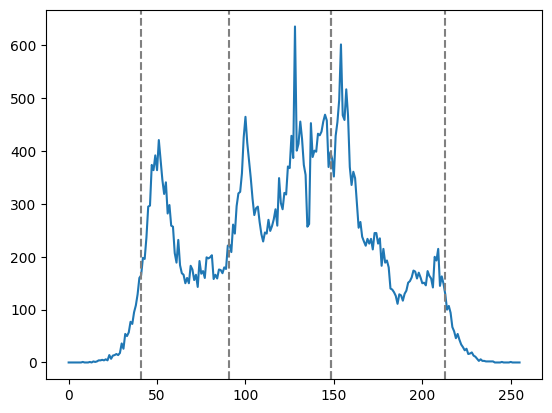

In [5]:
plt.plot(pixel_list)
for value in cluster_center:
    plt.axvline(x=value,linestyle='--',c='grey')

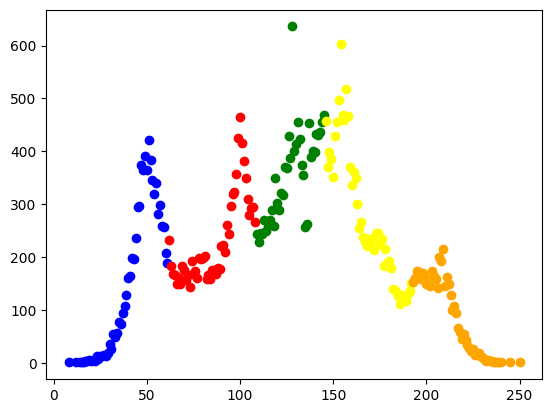

In [28]:
colors = ["blue", "red", "green", "yellow", "orange", "brown", "black"]
center = list(cluster_center)
k = 0
for i, pixel in data:
    plt.scatter(i, pixel, color = colors[center.index(cluster_centers[k])])
    k = k + 1